#### Quick notebook to plot the behavior of hard-coded bots vs the random built-in opponent

In [2]:
import torch
import torch.nn as nn
from torch import tensor as tt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.distributions import Categorical
import collections
import random
import pickle
import time
import seaborn as sns
sns.set_style('darkgrid')

# Custom file imports
import Scripts.trumps_no_pile as tnp
import Scripts.trumps_five_cards as tfc
import Scripts.fake_bots_architecture as far
import Scripts.fake_bots as fb
from Scripts.helpers import *

from Scripts.actor_critic import A2Cnet, ac_runner
from Scripts.epsilon_greedy_1 import eg_model, eg_runner
from Scripts.epsilon_greedy_2 import eg2_model, eg2_runner
from Scripts.policy_gradient import PolicyGradient, policy_runner


In [3]:
def plot_graphs(list_of_rewards, labels, limits=[0,1], color=False, title='Rewards for hard-coded bots'):
    # Plotting results
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
    for j, lst in enumerate(list_of_rewards):
        mar = moving_average(lst, 500)
        if not color:
            ax1.plot(range(len(mar)), mar, label=labels[j], linewidth=4)
        else:
            ax1.plot(range(len(mar)), mar, label=labels[j], linewidth=4, color=color)
    ax1.set_ylim(limits[0], limits[1])

    # Ax1 labels
    ax1.set_ylabel('Reward', fontsize=16)
    ax1.set_xlabel('Games played', fontsize=16)
    ax1.set_title(title, fontsize=20)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    # Formatting and showing
    ax1.legend(prop={'size': 13})
    fig.tight_layout()
    plt.show()

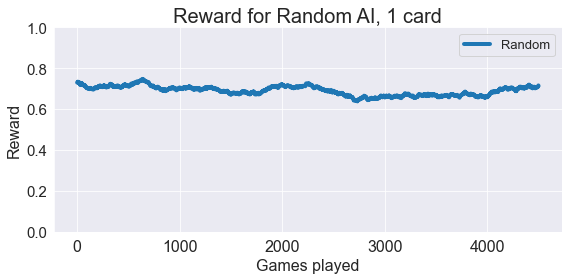

In [12]:
from Scripts.fake_bots import *
list_of_rewards, labels = [], []
env = far.SuperTrumps(num_cards=1, just_first=True)
list_of_rewards.append(simulate(env, random_player))
labels = ['Random']
plot_graphs(list_of_rewards, labels, limits=[0,1], title='Reward for Random AI, 1 card')

In [13]:
sum(list_of_rewards[0]) / len(list_of_rewards[0])

0.6928

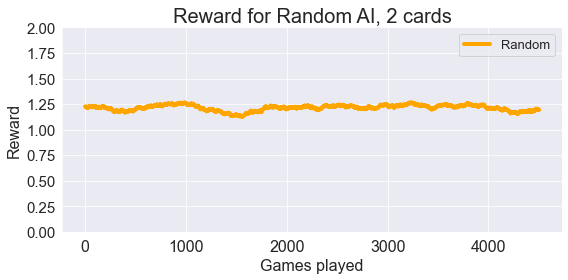

In [15]:
list_of_rewards, labels = [], []
env = far.SuperTrumps(num_cards=2, just_first=True)
list_of_rewards.append(simulate(env, random_player))
labels = ['Random']
plot_graphs(list_of_rewards, labels, limits=[0,2], color='orange', title='Reward for Random AI, 2 cards')

In [16]:
sum(list_of_rewards[0]) / len(list_of_rewards[0])

1.2134

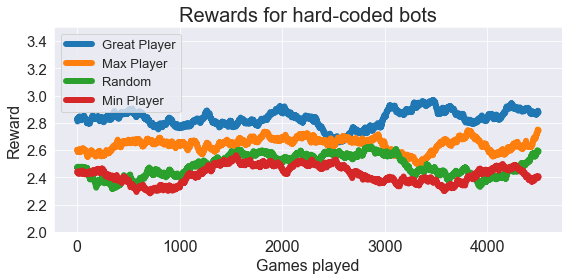

In [40]:
list_of_rewards, labels = [], []
env = far.SuperTrumps(num_cards=5, just_first=False)
list_of_rewards.append(simulate(env, great_player))
list_of_rewards.append(simulate(env, max_player))
list_of_rewards.append(simulate(env, random_player))
list_of_rewards.append(simulate(env, min_player))
labels = ['Great Player', 'Max Player', 'Random', 'Min Player']
plot_graphs(list_of_rewards,labels, limits=[2,3.5])